TICA and clustering with CN- of 80:20 KA sims
====

In [2]:
import pyemma
pyemma.__version__

'2.1.1'

In [3]:
import os
%pylab inline
matplotlib.rcParams.update({'font.size': 12})

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
from collections import Counter
import mdtraj as md
# from CN_functions import *
# from gen_dtraj_functions import *

Some useful inhouse functions
------

In [5]:
#from plot_functions import *
import pickle
import numpy as np

Read in the data
------

In [6]:
# Now, plot the networks

In [7]:
# just load the HMSMs for replotting
from networks_JFR import *

In [35]:
# get the cored trajectories
dtraj_OG = np.load('../../../PCA/dtrajs_regspaceB_nclust-50_ticadim-8_ticalag-1_clustdim-3.npy')
Ntraj = len(dtraj_OG)
traj_len = dtraj_OG[0].shape[0]
N_mss = [2,3,4,5,6]
dtrajs = []
for nstate in range(len(N_mss)):
    dtrajs.append([])
    dtraj_tmp = np.genfromtxt('dtraj_mss_concat_'+str(N_mss[nstate])+'states_cored.dat') 
    for traj in range(Ntraj):
        dtrajs[nstate].append( dtraj_tmp[traj*traj_len:(traj+1)*traj_len].astype(int) )

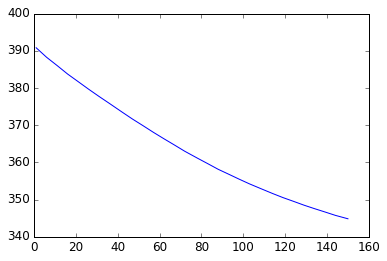

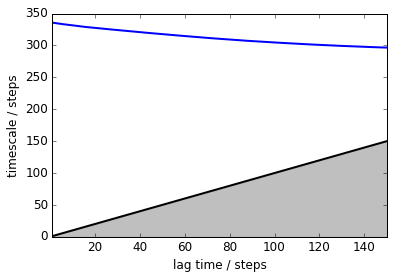

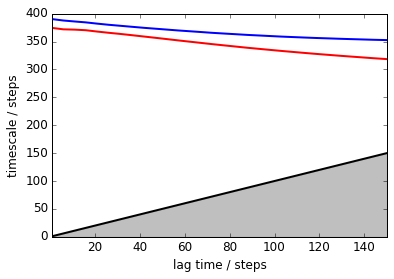

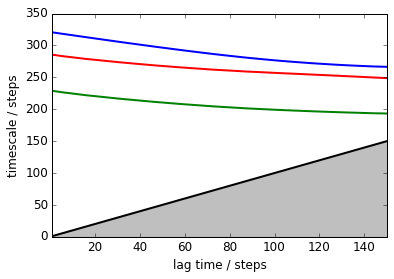

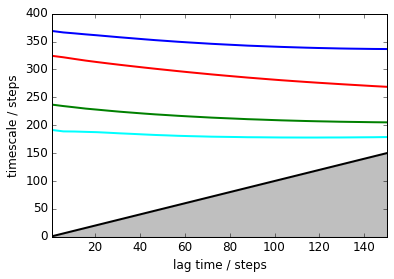

In [36]:
lags = np.linspace(1,150,30,dtype=int)
for nstate in range(len(N_mss)):
    its_full = msm.timescales_msm(dtrajs[nstate], lags=lags, nits=N_mss[nstate]-1)
    if (N_mss[nstate]-1==1):
        plt.plot(lags,its_full.timescales)
        plt.show()
    else:
        mplt.plot_implied_timescales(its_full, ylog=False, units='steps', linewidth=2)
        plt.show()

In [40]:
lag_opt = 20*np.ones(len(N_mss)).astype(int)
lag_opt

array([20, 20, 20, 20, 20])

In [41]:
msm_opt = []
for nstate in range(len(N_mss)):
    msm_opt.append(msm.estimate_markov_model(dtrajs[nstate], lag_opt[nstate], reversible=True))

In [42]:
# define the color schemes for the mss_sets
from matplotlib.pyplot import *
mycmap = plt.cm.rainbow
mss_colors = []
for nstate in range(len(N_mss)):
    mycmap_max = N_mss[nstate]
    mycmap_min = 0
    # extract all colors from the map
    mycmaplist = [mycmap(i) for i in range(mycmap.N)]
    # create the new map
    mycmap = mycmap.from_list('Custom cmap', mycmaplist, mycmap.N)
    # define the bins and normalize
    bounds = np.linspace(mycmap_min,mycmap_max,mycmap.N)
    norm = matplotlib.colors.BoundaryNorm(bounds, mycmap.N)
    mycmaplist = [mycmap(i) for i in range(mycmap.N)]
    dx = bounds[1] - bounds[0]
    mss_colors.append([])
    for state in range(N_mss[nstate]):
        grid = int( (state - mycmap_min)/dx + 0.5 )
        mss_colors[nstate].append(mycmaplist[grid])

[1, 2]


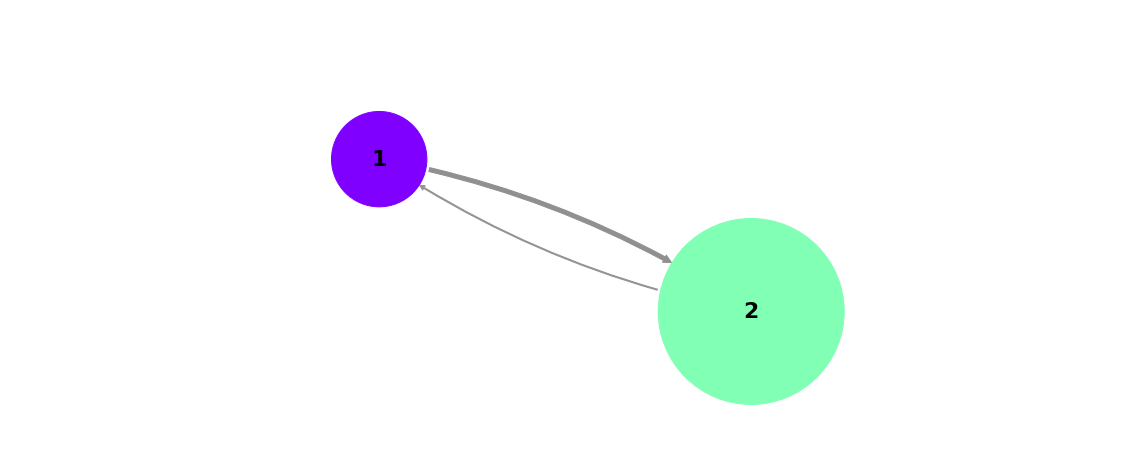

In [51]:
nstate = 0

# options
minflux=1e-9
max_flux=1
arrow_labels=None 
max_width=20
max_height=15
figpadding=1
state_scale = 2
arrow_scale = 5
flux_fact = 1
flux_scale = 1
fontsize=22
fontweight='bold'

state_labels = [ x+1 for x in range(N_mss[nstate])]

fig,pos = plot_flux(msm_opt[nstate].P, state_labels=state_labels, flux_scale=flux_scale,state_sizes=msm_opt[nstate].stationary_distribution,state_colors=mss_colors[nstate], minflux=minflux, max_width=max_width, max_height=max_height, figpadding=figpadding, state_scale=state_scale, arrow_scale=arrow_scale, size=fontsize, weight=fontweight, show_committor=False, max_flux=max_flux,arrow_labels=arrow_labels)
gca().set_frame_on(False)
#plt.tight_layout()
# plt.savefig('Network_2state_B-type.svg', format='svg', dpi=800, bbox_inches='tight')
# plt.savefig('Network_2state_B-type.eps', format='eps', dpi=800, bbox_inches='tight')
plt.show()

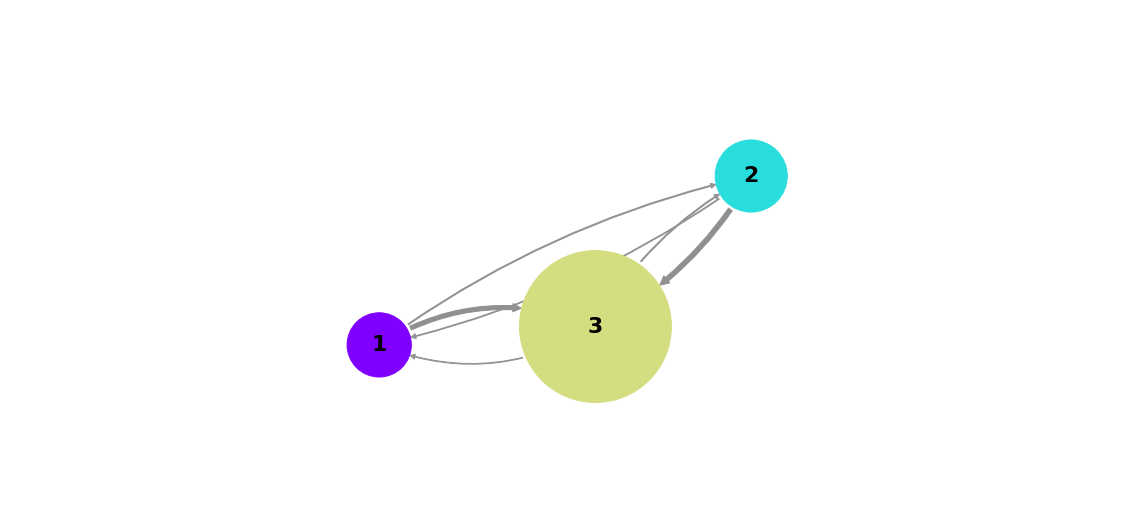

In [52]:
nstate = 1

# options
minflux=1e-9
max_flux=1
arrow_labels=None 
max_width=20
max_height=15
figpadding=1
state_scale = 2
arrow_scale = 5
flux_fact = 1
flux_scale = 1
fontsize=22
fontweight='bold'

state_labels = [ x+1 for x in range(N_mss[nstate])]

fig,pos = plot_flux(msm_opt[nstate].P, state_labels=state_labels, flux_scale=flux_scale,state_sizes=msm_opt[nstate].stationary_distribution,state_colors=mss_colors[nstate], minflux=minflux, max_width=max_width, max_height=max_height, figpadding=figpadding, state_scale=state_scale, arrow_scale=arrow_scale, size=fontsize, weight=fontweight, show_committor=False, max_flux=max_flux,arrow_labels=arrow_labels)
gca().set_frame_on(False)
#plt.tight_layout()
# plt.savefig('Network_2state_B-type.svg', format='svg', dpi=800, bbox_inches='tight')
# plt.savefig('Network_2state_B-type.eps', format='eps', dpi=800, bbox_inches='tight')
plt.show()

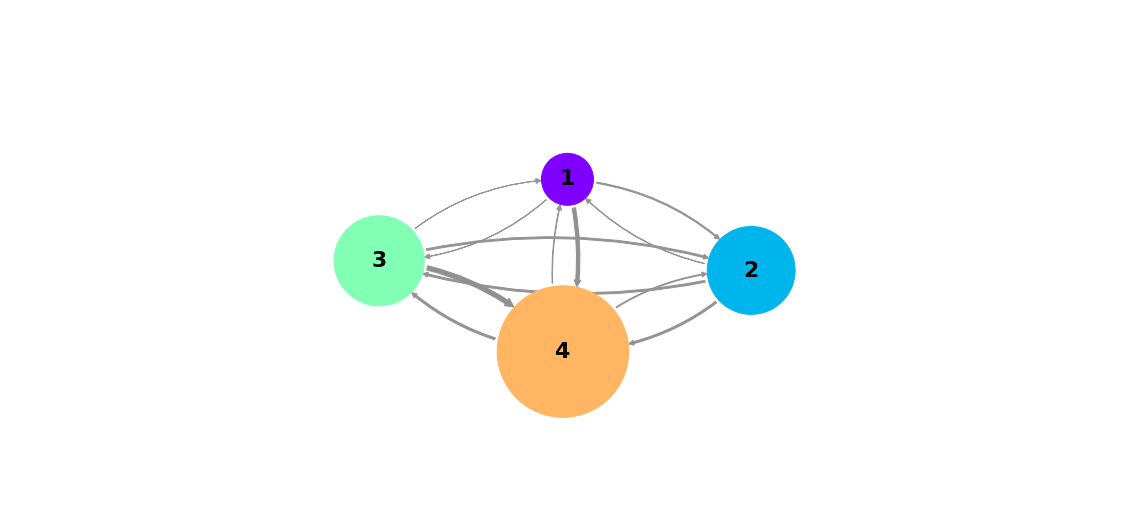

In [53]:
nstate = 2

# options
minflux=1e-9
max_flux=1
arrow_labels=None 
max_width=20
max_height=15
figpadding=1
state_scale = 2
arrow_scale = 5
flux_fact = 1
flux_scale = 1
fontsize=22
fontweight='bold'

state_labels = [ x+1 for x in range(N_mss[nstate])]

fig,pos = plot_flux(msm_opt[nstate].P, state_labels=state_labels, flux_scale=flux_scale,state_sizes=msm_opt[nstate].stationary_distribution,state_colors=mss_colors[nstate], minflux=minflux, max_width=max_width, max_height=max_height, figpadding=figpadding, state_scale=state_scale, arrow_scale=arrow_scale, size=fontsize, weight=fontweight, show_committor=False, max_flux=max_flux,arrow_labels=arrow_labels)
gca().set_frame_on(False)
#plt.tight_layout()
# plt.savefig('Network_2state_B-type.svg', format='svg', dpi=800, bbox_inches='tight')
# plt.savefig('Network_2state_B-type.eps', format='eps', dpi=800, bbox_inches='tight')
plt.show()

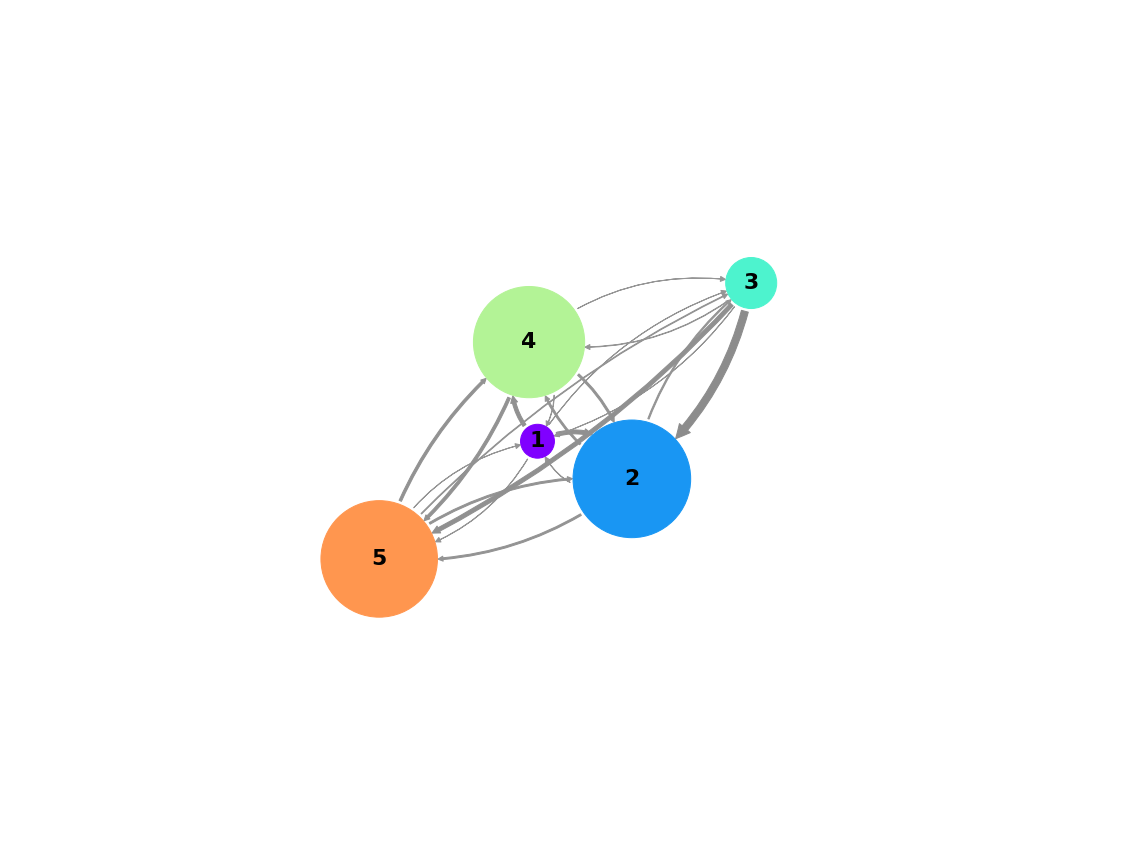

In [54]:
nstate = 3

# options
minflux=1e-9
max_flux=1
arrow_labels=None 
max_width=20
max_height=15
figpadding=1
state_scale = 2
arrow_scale = 5
flux_fact = 1
flux_scale = 1
fontsize=22
fontweight='bold'

state_labels = [ x+1 for x in range(N_mss[nstate])]

fig,pos = plot_flux(msm_opt[nstate].P, state_labels=state_labels, flux_scale=flux_scale,state_sizes=msm_opt[nstate].stationary_distribution,state_colors=mss_colors[nstate], minflux=minflux, max_width=max_width, max_height=max_height, figpadding=figpadding, state_scale=state_scale, arrow_scale=arrow_scale, size=fontsize, weight=fontweight, show_committor=False, max_flux=max_flux,arrow_labels=arrow_labels)
gca().set_frame_on(False)
#plt.tight_layout()
# plt.savefig('Network_2state_B-type.svg', format='svg', dpi=800, bbox_inches='tight')
# plt.savefig('Network_2state_B-type.eps', format='eps', dpi=800, bbox_inches='tight')
plt.show()